In [1]:
import torch

filename = "/mnt/BigHD_1/loucas/data-w-camera/0b375ebf-c2a2-4fcd-9cd2-53008b95cf55.pt"
t = torch.load(filename)

RuntimeError: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.

In [2]:
sensor_data = t["sensor_data"]
sensor_data.shape

torch.Size([300, 12, 35])

In [3]:
sensor_data = sensor_data[:, 0, :]
sensor_data.shape

torch.Size([300, 35])

In [5]:
import matplotlib.pyplot as plt

In [7]:
sensor_data = sensor_data.cpu()

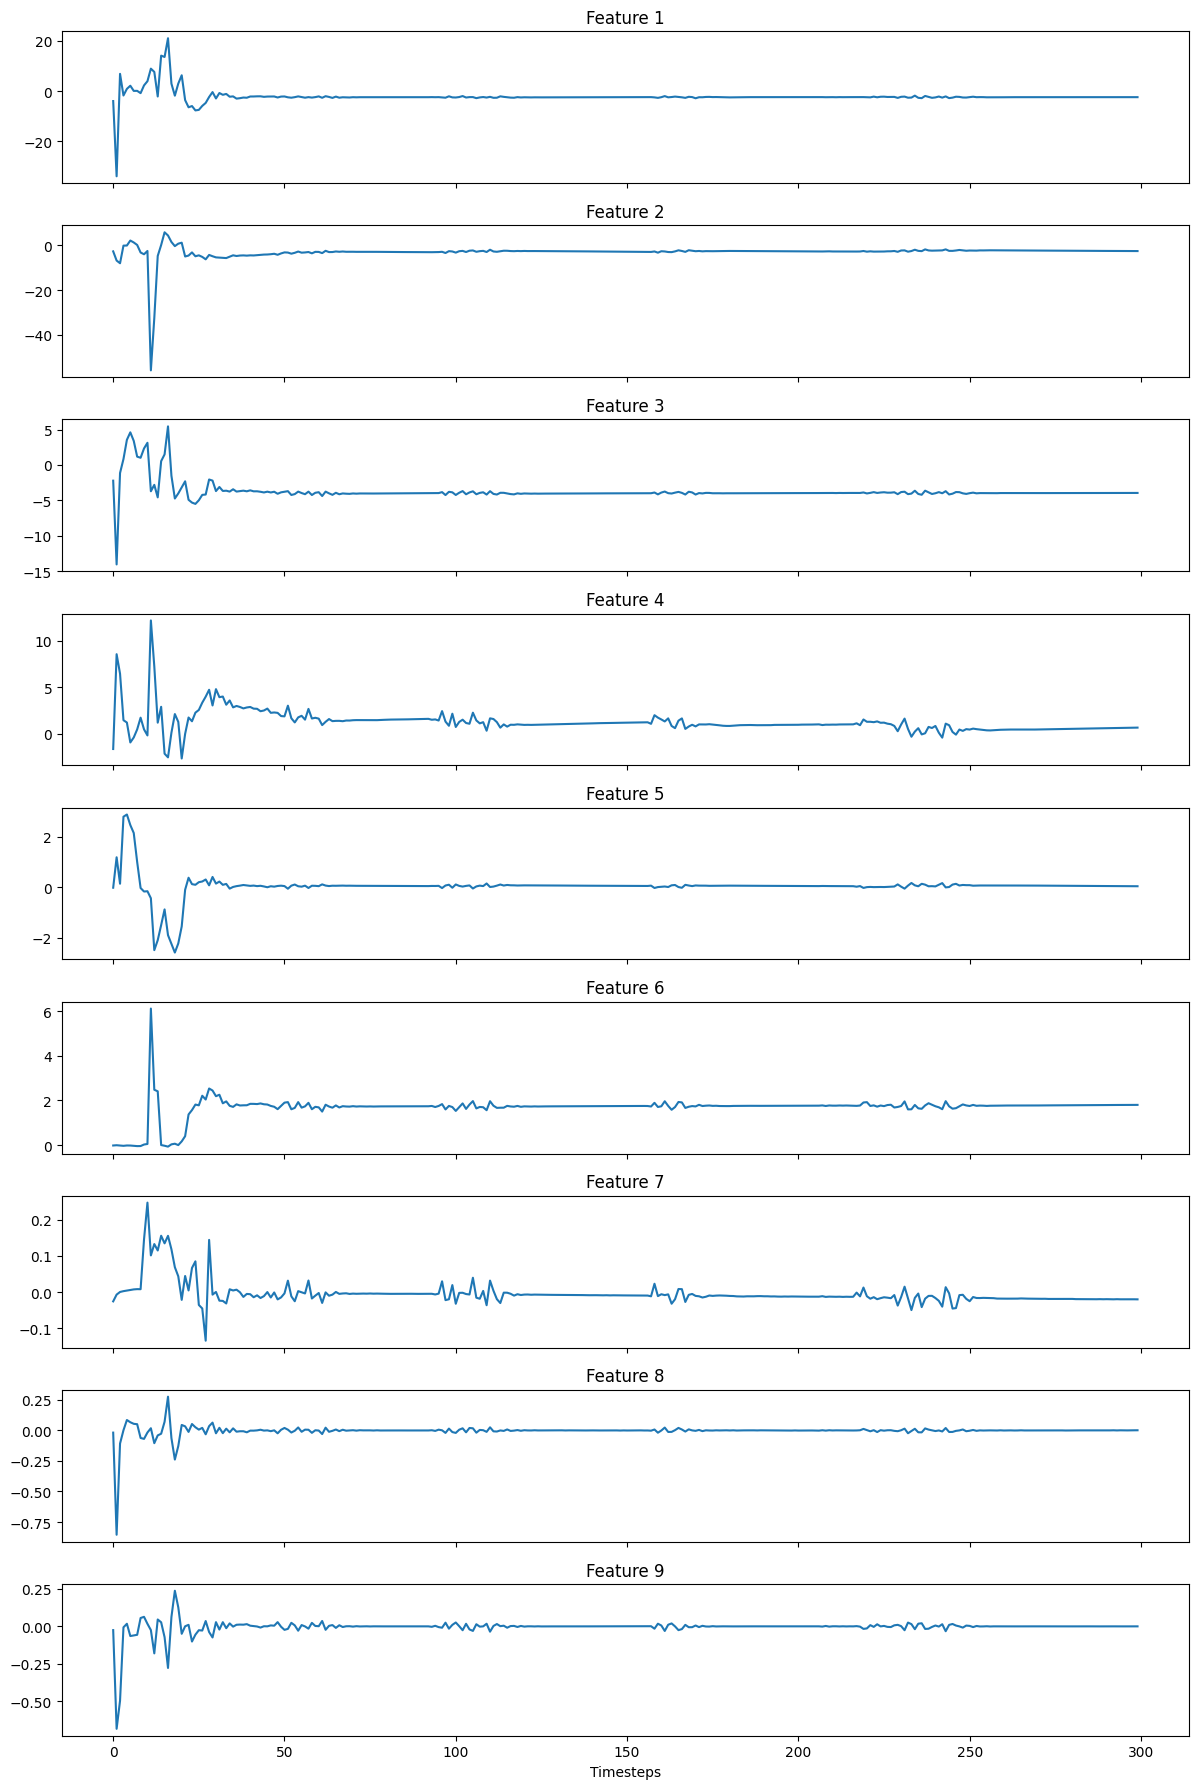

In [17]:
# Extract the first 9 features
features_to_plot = sensor_data[:, :9].numpy()

# Plot each feature
fig, axes = plt.subplots(9, 1, figsize=(12, 18), sharex=True)

for i in range(9):
    axes[i].plot(features_to_plot[:, i])
    axes[i].set_title(f"Feature {i+1}")

plt.xlabel("Timesteps")
plt.tight_layout()
plt.show()

In [23]:
camera_data = t["camera_data"]
camera_data.shape

torch.Size([300, 12, 3, 256, 256, 4])

In [24]:
camera_data = camera_data[:, 0].cpu()
camera_data.shape

torch.Size([300, 3, 256, 256, 4])

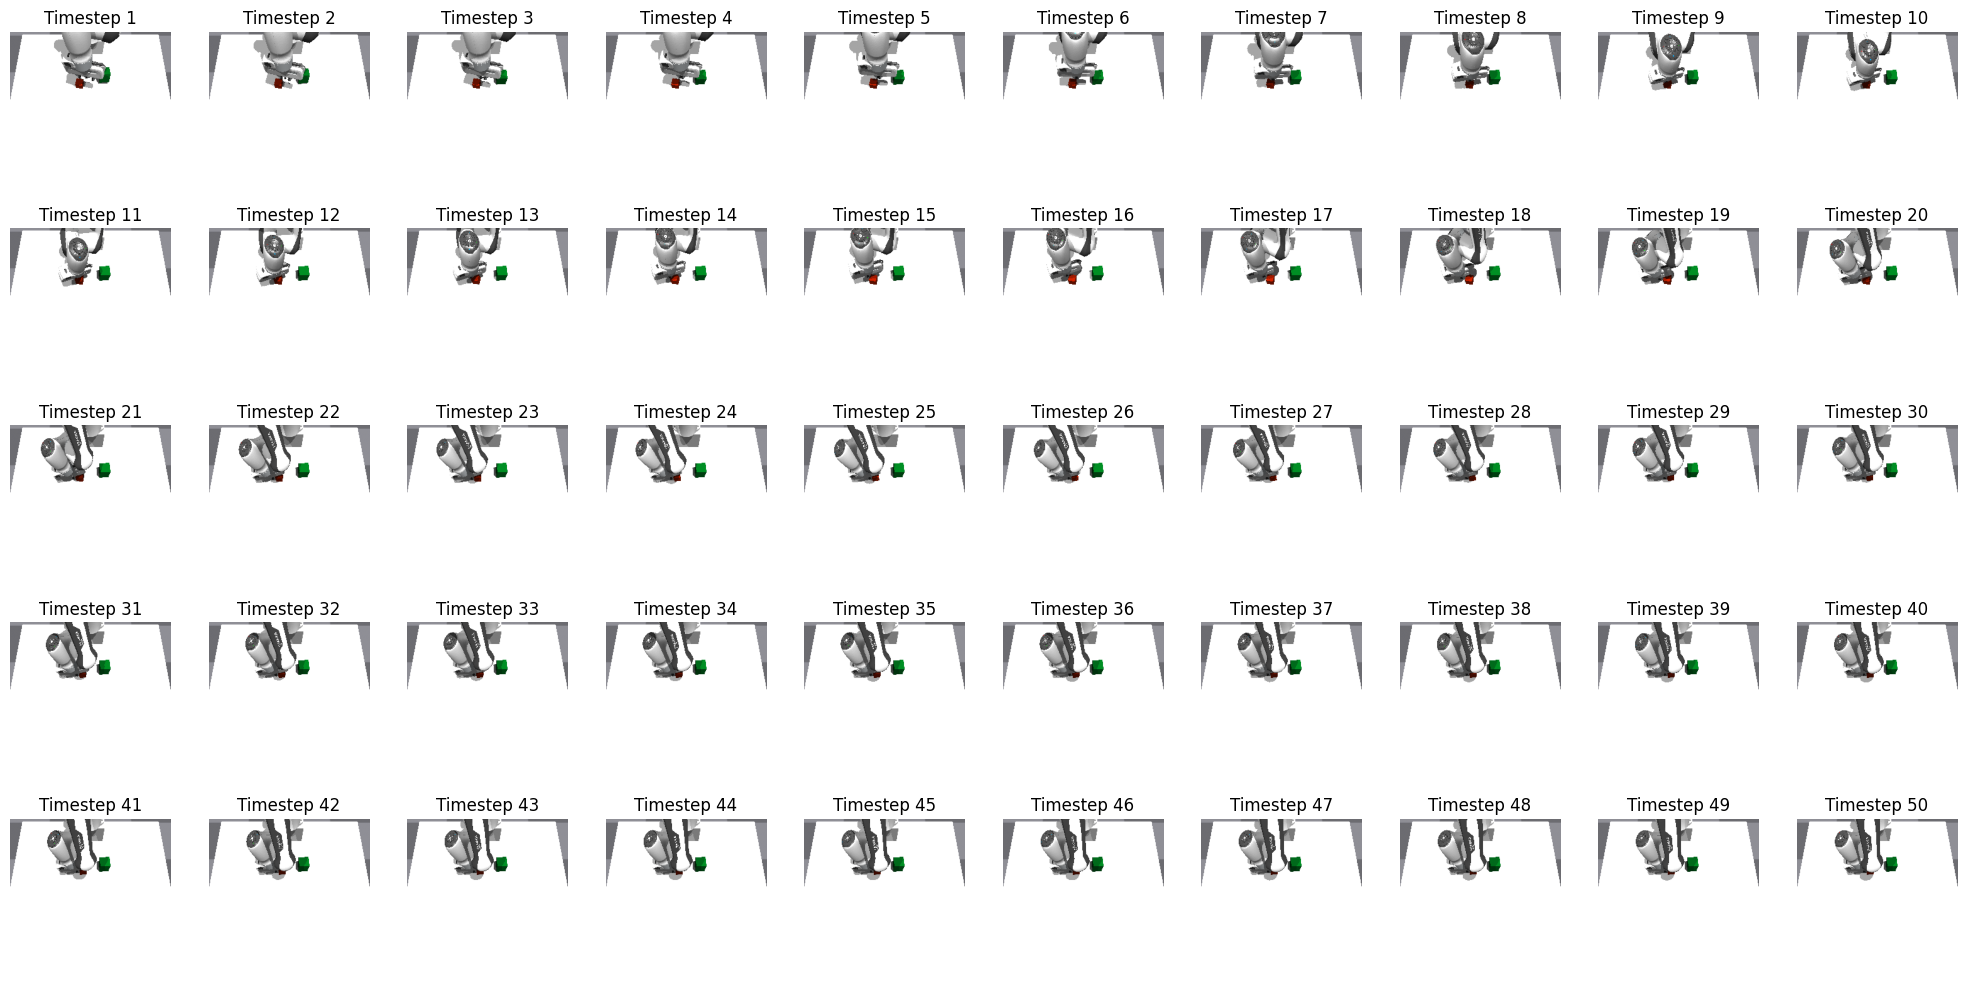

In [28]:
# Extract the first 50 images from the first orientation
images_to_plot = camera_data[:, 0, :, :, :].numpy()

# Plot the first 50 images
fig, axes = plt.subplots(5, 10, figsize=(20, 10))

for i in range(5):
    for j in range(10):
        image = images_to_plot[i * 10 + j]
        axes[i, j].imshow(
            (image - image.min()) / (image.max() - image.min())
        )  # Normalize for display
        axes[i, j].axis("off")
        axes[i, j].set_title(f"Timestep {i*10 + j + 1}")

plt.tight_layout()
plt.show()